In this NLP project we will do EDA and then attempt to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Import all relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data set

In [7]:
yelpdf=pd.read_csv("C:\\Users\\vikhyathrai\\Documents\\Python Scripts\\My DS ML notebooks\\yelp.csv")

Exploratory Data Analysis

In [8]:
yelpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [10]:
yelpdf.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [13]:
yelpdf[yelpdf['funny']==57]['text'].iloc[0]

'Scary things to me:\nParis Hilton has a career. \nSarah Palin. Really. She\'s like the new Anita Bryant. \nMy fathers\' overgrown eyebrows. Trim, daddy, trim!\nDroves of high schoolers leaving school just as I\'m trying to find Barrio Cafe. \n\nSeriously. Like thousands of them. And I couldn\'t find the damn restaurant. What was I gonna do? Roll down the window (well, not roll down, seriously, who rolls down windows anymore?) and holler out in my best lispy voice, "Hey, squeeze me fellas, I\'m going to a wine tasting at the Barrio Cafe. Y\'all know where that is?" Since all teenagers carry guns, yes, that scared me. \n\nFinally. I found it. And entered. \n\nCute. Cozy. Middle of the day, so empty. Great, vibrant art. And a very attentive and friendly staff. Often times at this time of day, restaurants really drop the ball. No ball dropping here.\nI had La Paloma margarita which is made with a grapefruit soda. Think Squirt and Patron! And after a couple of these babies I was in el bano

Histogram of the text length based on star ratings

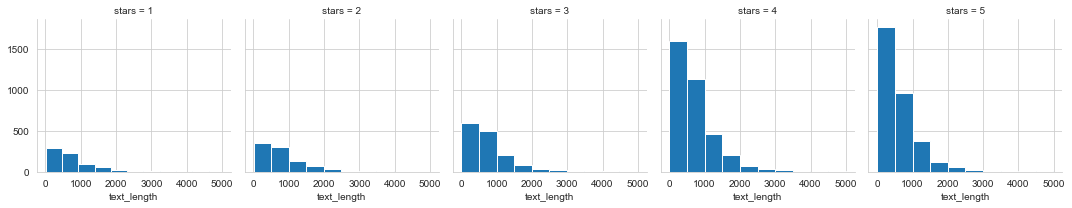

In [18]:
sns.set_style('whitegrid')
yelpdf['text_length']=yelpdf['text'].apply(len)
myfacet=sns.FacetGrid(yelpdf,col='stars')
myfacet.map(plt.hist,'text_length')

Boxplot of the text length based on star ratings

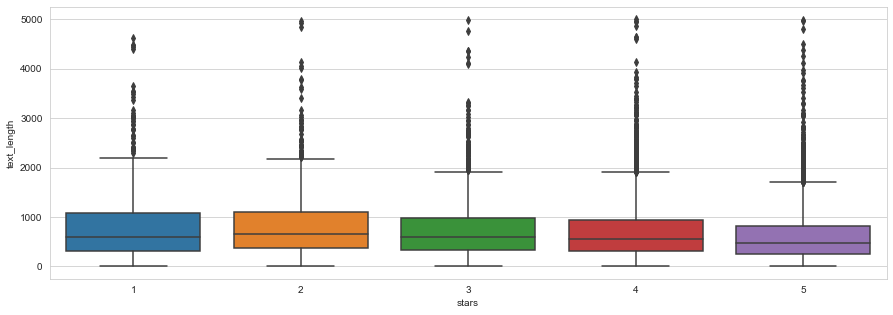

In [22]:
myfig,myaxes=plt.subplots(nrows=1,ncols=1,figsize=(15,5))
sns.boxplot(data=yelpdf,x='stars',y='text_length', )

plotting Number of Stars

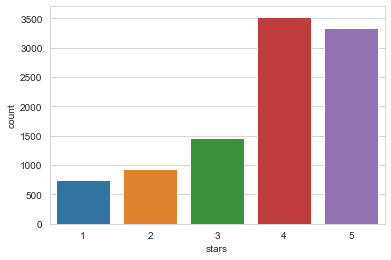

In [23]:
sns.countplot(data=yelpdf,x='stars')

Statistics

In [28]:
yelpdf.groupby('stars').mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [35]:
yelpdf.corr()

,stars,cool,useful,funny,text_length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
text_length,-0.114674,0.241451,0.293975,0.251760,1.000000


In [32]:
yelpdf.groupby('stars').mean().corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


HeatMap

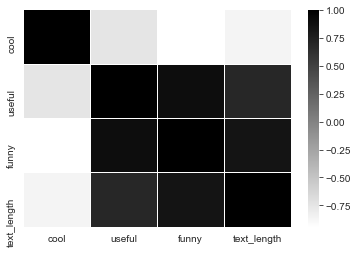

In [39]:
sns.heatmap(yelpdf.groupby('stars').mean().corr(),cmap='gray_r',linewidths=0.05,linecolor='white')

NLP Classifier

*Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [57]:
yelp_class1=yelpdf[yelpdf['stars']==1]
yelp_class5=yelpdf[yelpdf['stars']==5]

In [59]:
yelp_class=pd.concat([yelp_class1,yelp_class5])

In [67]:
yelp_class['stars'].unique()

array([1, 5], dtype=int64)

Splitting features and labels

In [68]:
X=yelp_class['text']
Y=yelp_class['stars']

Importing NLP toolkits

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


Cleansing Text

In [76]:
import string
from nltk.corpus  import stopwords

In [77]:
def text_process(message):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    
    nopunc=[charac for charac in message if charac not in string.punctuation]
    
    nopuncstr=''.join(nopunc)
    nopunclist=nopuncstr.split()
    return [item for item in nopunclist if item not in stopwords.words('english')]

Vectorizing text

In [78]:
bow_Vectorizer=CountVectorizer(analyzer=text_process).fit(X)
X=bow_Vectorizer.transform(X)

Importing relavant libraries

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

Train test split and building Naive Beyes model

In [95]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=111)

In [96]:
mynb=MultinomialNB()

In [97]:
mynb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Predicting and evaluating performance

In [98]:
predictions=mynb.predict(X_test)

In [99]:
np.unique(predictions)

array([1, 5], dtype=int64)

In [100]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           1       0.86      0.59      0.70       215
           5       0.92      0.98      0.95      1011

    accuracy                           0.91      1226
   macro avg       0.89      0.78      0.82      1226
weighted avg       0.91      0.91      0.90      1226



In [101]:
print(confusion_matrix(Y_test,predictions))

[[126  89]
 [ 20 991]]


Including TF-IDF to this process using a pipeline

In [92]:
from sklearn.pipeline import Pipeline

In [93]:
mypipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Resplitting Original texts

In [102]:
X=yelp_class['text']
Y=yelp_class['stars']

In [103]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=111)

modelling Pipeline

In [105]:
mypipeline.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000026F8204F0D8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Predicting and evaluating performance

In [109]:
predictions_with_tfidf=mypipeline.predict(X_test)

In [110]:
print(classification_report(Y_test,predictions_with_tfidf))

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       215
           5       0.83      1.00      0.90      1011

    accuracy                           0.83      1226
   macro avg       0.91      0.50      0.46      1226
weighted avg       0.86      0.83      0.75      1226



In [111]:
print(confusion_matrix(Y_test,predictions_with_tfidf))

[[   1  214]
 [   0 1011]]


Using the TFIDF is making the model worser